In [102]:
# Pacotes
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.datasets import co2, get_rdataset

from plotnine import *

from statsmodels.tsa.seasonal import seasonal_decompose, STL

from statsmodels.tsa.filters.hp_filter import hpfilter

In [103]:
# Dataset: co2
co2_df = co2.load_pandas().data
co2_df = co2_df.ffill()

In [104]:
# Dataset: AirPassengers
air_passengers = get_rdataset("AirPassengers")
airp_df = air_passengers.data
airp_df.index = pd.date_range('1949', '1961', freq='M')
airp_df.drop(columns=['time'], inplace=True)

In [105]:
co2_df.head(2)

,co2
1958-03-29,316.1
1958-04-05,317.3


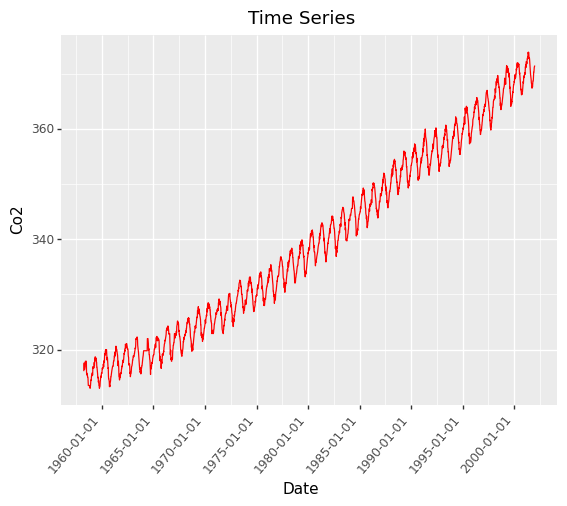

<ggplot: (179611705992)>

In [106]:
# Time Series
G1 = ggplot(co2_df,aes(y='co2',x='co2_df.index'))+geom_line(colour='red')+ \
theme(axis_text_x=element_text(rotation=50, hjust=1))+\
labs(x='Date',y='Co2',title='Time Series')
G1

# Decomposição da série temporal: Além disso, existem três componentes principais para qualquer processo de série temporal: tendência, sazonalidade e residual. A decomposição de uma série temporal é o processo de extrair as três componentes e representá-las como seus modelos. A modelagem das componentes decompostos pode ser aditivo ou multiplicativo.
    - A tendência dá uma noção da direção de longo prazo da série temporal e pode ser ascendente, descendente ou horizontal.
    - Sazonalidade são padrões repetidos ao longo do tempo. Por exemplo, uma série temporal de dados de vendas pode mostrar um aumento nas vendas na época do Natal.
    - O residuo é simplesmente a parte restante ou inexplicável, uma vez que extraímos a tendência e a sazonalidade.

# DECOMPOSIÇÃO - Você tem um modelo aditivo quando a série temporal original pode ser reconstruída adicionando todos os três componentes.
    - Um modelo de decomposição aditivO é razoável quando as variações sazonais não mudam ao longo do tempo. 
    - Por outro lado, se a série temporal puder ser reconstruída multiplicando todos os três componentes, você terá um modelo multiplicativo. Um modelo multiplicativo é adequado quando a variação sazonal flutua ao longo do tempo    


    Os dados co2_df mostram uma tendência linear (ascendente) de longo prazo, com um padrão sazonal repetido a uma taxa constante (variação sazonal). Isso indica que o conjunto de dados de CO2 é um modelo aditivo.

In [107]:
airp_df.head(5)

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


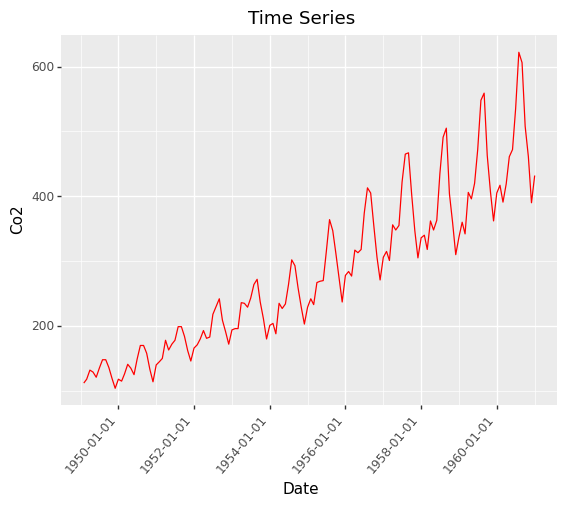

<ggplot: (179611822071)>

In [108]:
# Time Series
G2 = ggplot(airp_df,aes(y='value',x='airp_df.index'))+geom_line(colour='red')+ \
theme(axis_text_x=element_text(rotation=50, hjust=1))+\
labs(x='Date',y='Co2',title='Time Series')
G2

# Os dados airp_df mostram uma tendência linear (ascendente) de longo prazo e sazonalidade. 
# No entanto, as flutuações de sazonalidade também '''parecem estar aumentando''', indicando um modelo '''multiplicativo'''.

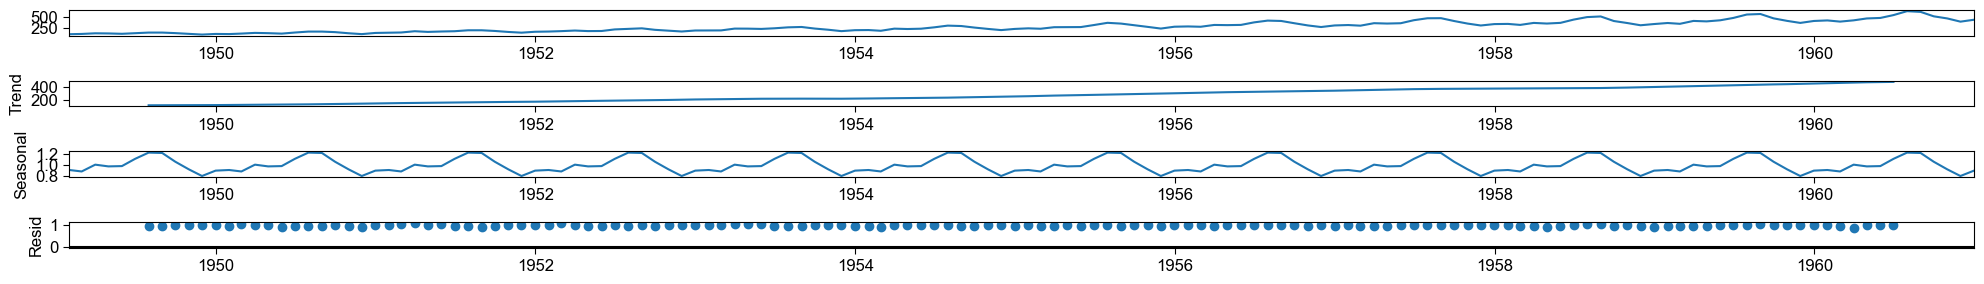

In [109]:
# Decomposição utilizando diferentes tipos de modelos:: decisão com base no plot da série temporal
co2_decomposed = seasonal_decompose(co2_df,model='additive')

air_decomposed = seasonal_decompose(airp_df,model='multiplicative')

air_decomposed.plot(); plt.show()



# Vamos dividir o gráfico resultante em quatro partes:
1. Estes são os dados observados originais que estamos decompondo.

2. O componente de tendência mostra uma direção ascendente. A tendência indica se há um movimento de longo prazo positivo (crescente ou ascendente), negativo (decrescente ou descendente) ou constante (sem tendência ou horizontal).

3. O componente sazonal mostra o efeito da sazonalidade e o padrão de repetição de altos e baixos.

4. Finalmente, o componente residual (ruído) mostra a variação aleatória nos dados após a aplicação do modelo. Neste caso, foi utilizado um modelo multiplicativo.

Da mesma forma, você pode plotar a decomposição do conjunto de dados de CO2:

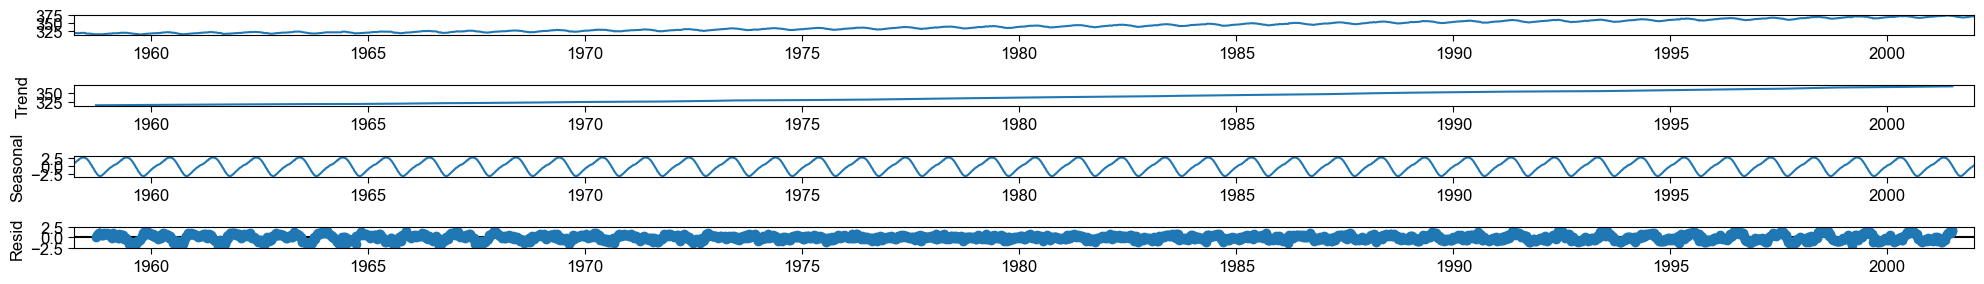

In [110]:
co2_decomposed.plot(); plt.show()

# OBSERVAÇÃO
 - Ao reconstruir a série temporal, por exemplo, em um modelo multiplicativo, você estará multiplicando os três componentes. 

<AxesSubplot: >

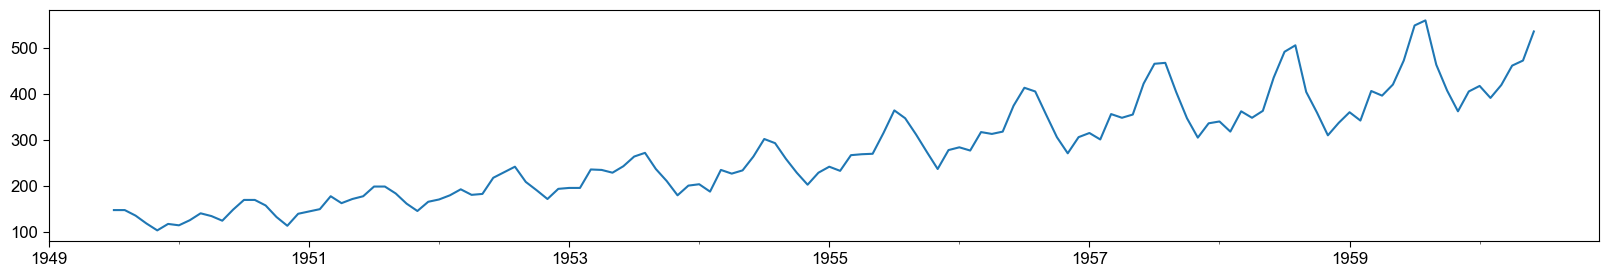

In [111]:
# Para demonstrar esse conceito, use air_decomposed, uma instância da classe DecomposeResult. A classe fornece os atributos sazonal, 
# tendência e resid, bem como o método .plot().

(air_decomposed.trend * 
 air_decomposed.seasonal * 
 air_decomposed.resid).plot() 

# Ao multiplizar as 3 componentes recuperamos a série temporal  air_decomposed.__dict__


# TÉCNICA MAIS AVANÇADA DE DECOMPOSIÇÃO: STL - REQUER DOIS PARÂMETROS: sazonais e robustos
    -   O parâmetro sazonal é para o suavizador sazonal e só pode aceitar valores inteiros ímpares maiores ou iguais a 7. Além do suavizador de tendência (o parâmetro de tendência)
    -   O segundo parâmetro é robusto, que assume um valor booleano (True ou False). Definir robust=True ajuda a remover o impacto de outliers em componentes sazonais e de tendência quando calculados.

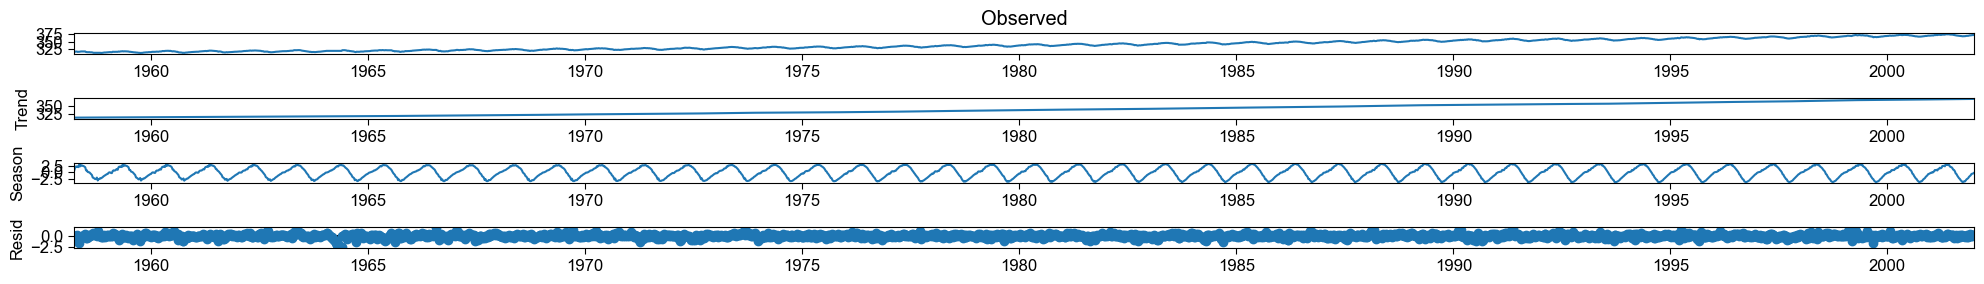

In [112]:
# Aplicação do STL
co2_stl = STL(    co2_df,     seasonal=13,     robust=True).fit()

co2_stl.plot(); plt.show()

# Você notará que os gráficos residuais parecem diferentes, indicando que ambos os métodos capturam informações semelhantes usando mecanismos distintos.
# Ao usar STL, você forneceu sazonal=13 porque os dados têm um efeito sazonal anual.


# Mais decomposição: O filtro Hodrick-Prescott é um filtro de suavização que pode ser usado para separar as flutuações de curto prazo (variações cíclicas) das tendências de longo prazo. Isso é implementado como hp_filter na biblioteca statsmodels

In [113]:
# Aplicação
plt.rcParams["figure.figsize"] = (20,3) # Tamanho da Figura

co2_cyclic, co2_trend = hpfilter(co2_df)

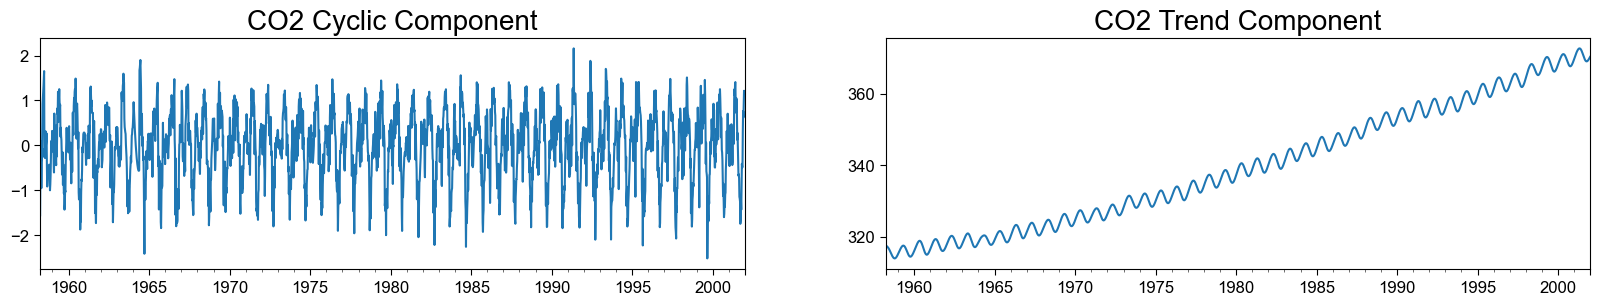

In [114]:
fig, ax = plt.subplots(1,2)
co2_cyclic.plot(ax=ax[0], title='CO2 Cyclic Component')
co2_trend.plot(ax=ax[1], title='CO2 Trend Component')
ax[0].title.set_size(20); ax[1].title.set_size(20)

- Observe que os dois componentes de hp_filter são aditivos. Em outras palavras, para reconstruir a série temporal original, você adicionaria co2_cyclic e co2_trend.

<AxesSubplot: >

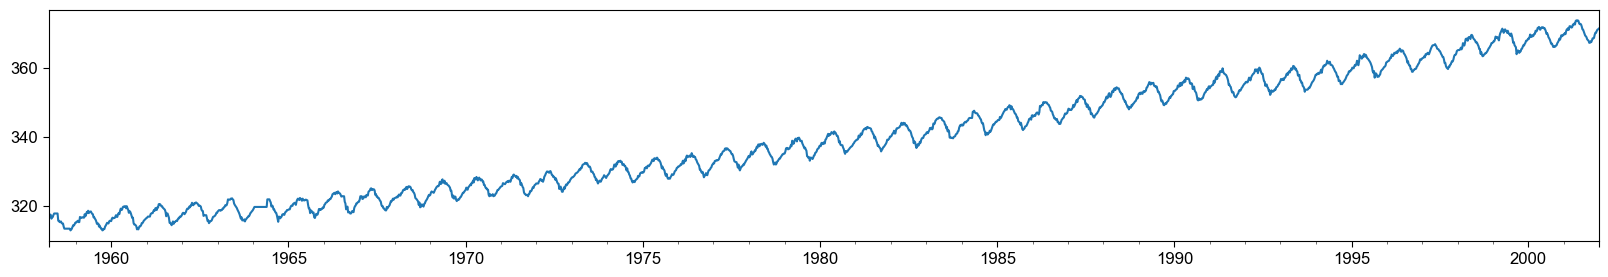

In [115]:
(co2_cyclic + co2_trend).plot() 